**Algoritmo utilizado para Atividade:**  <font color='red'>DBSCAN</font>

**Dataset:** <font color='blue'>Numenta Anomaly Benchmark (NAB)</font>

**Arquivo importado**: <font color='blue'>"machine_temperature_system_failure.csv"</font> . Trata-se de dados do sensor de temperatura de um
componente interno de uma grande máquina industrial.


# Importação das bibliotecas e carregamento dos dados:

In [ ]:
# Bibliotecas importadas:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carregar os dados:
df = pd.read_csv('/content/machine_temperature_system_failure.csv')

# Análise exploratória e preparação dos dados:

In [ ]:
df.head(10)

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836
5,2013-12-02 21:40:00,78.710418
6,2013-12-02 21:45:00,80.269784
7,2013-12-02 21:50:00,80.272828
8,2013-12-02 21:55:00,80.353425
9,2013-12-02 22:00:00,79.486523


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  22695 non-null  object 
 1   value      22695 non-null  float64
dtypes: float64(1), object(1)
memory usage: 354.7+ KB


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22695 entries, 0 to 22694
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  22695 non-null  datetime64[ns]
 1   value      22695 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 354.7 KB


In [ ]:
df.isnull().sum()

timestamp    0
value        0
dtype: int64

In [ ]:
df['timestamp'].min()

Timestamp('2013-12-02 21:15:00')

In [ ]:
df['timestamp'].max()

Timestamp('2014-02-19 15:25:00')

In [ ]:
df['value'].describe()

count    22695.000000
mean        85.926498
std         13.746912
min          2.084721
25%         83.080078
50%         89.408246
75%         94.016252
max        108.510543
Name: value, dtype: float64

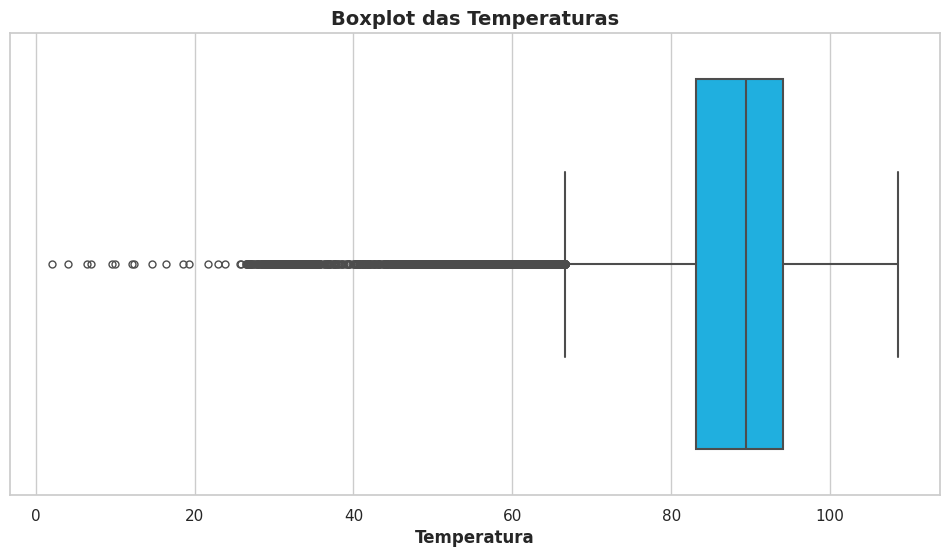

In [ ]:
# Plotar Boxplot:
plt.figure(figsize=(12, 6))
box = sns.boxplot(x=df['value'], color="deepskyblue", fliersize=5, linewidth=1.5)
plt.title('Boxplot das Temperaturas', fontsize=14, fontweight='bold')
plt.xlabel('Temperatura', fontsize=12, fontweight='bold')
plt.show()

In [ ]:
 # Redimensionar para formato de matriz 2D necessário para o dbscan:
temperatures = df['value'].values.reshape(-1, 1)

# Aplicação do Algoritmo Não Supervisionado e Visualizações:

In [ ]:
# Aplicação do DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(temperatures)

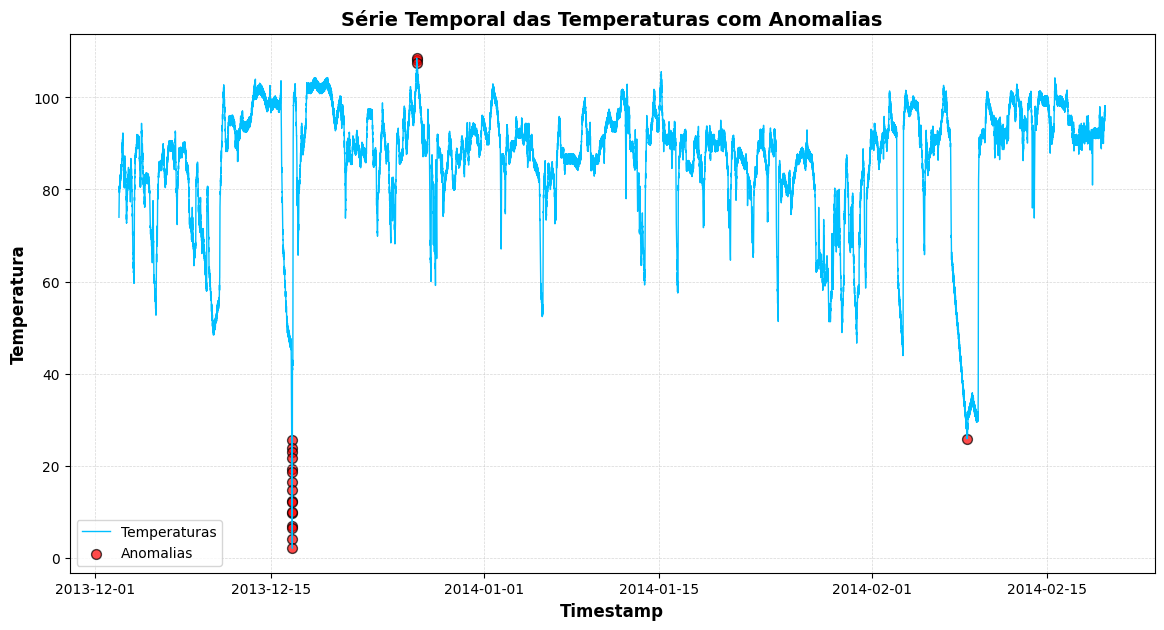

In [ ]:
# Visualização
plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['value'], color='deepskyblue', label='Temperaturas', linewidth=1)
anomalies = df[clusters == -1]
plt.scatter(anomalies['timestamp'], anomalies['value'], color='red', label='Anomalias', s=50, edgecolor='black', alpha=0.7)
plt.xlabel('Timestamp', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Série Temporal das Temperaturas com Anomalias', fontsize=14, fontweight='bold')
plt.legend(frameon=True, loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

In [ ]:
# Contar número de anomalias (clusters com label -1)
num_anomalies = anomalies.shape[0]
print(f"Número de anomalias detectadas: {num_anomalies}")

Número de anomalias detectadas: 20


In [ ]:
# Imprimir as datas, horários e valores das temperaturas anômalas:
print("Valores das Temperaturas Anômalas:")
print(anomalies[['timestamp', 'value']])

Valores das Temperaturas Anômalas:
                timestamp       value
3972  2013-12-16 16:15:00   25.680672
3973  2013-12-16 16:20:00   23.829044
3974  2013-12-16 16:25:00   22.983839
3975  2013-12-16 16:30:00   21.737032
3976  2013-12-16 16:35:00   19.277179
3977  2013-12-16 16:40:00   18.591971
3978  2013-12-16 16:45:00   16.457109
3979  2013-12-16 16:50:00   14.671060
3980  2013-12-16 16:55:00   12.414093
3981  2013-12-16 17:00:00    9.633952
3982  2013-12-16 17:05:00   10.001966
3983  2013-12-16 17:10:00    6.918645
3984  2013-12-16 17:15:00    6.440238
3985  2013-12-16 17:20:00    4.117241
3986  2013-12-16 17:25:00    2.084721
3987  2013-12-16 17:30:00   12.120381
6845  2013-12-26 15:40:00  108.117420
6846  2013-12-26 15:45:00  108.510543
6848  2013-12-26 15:55:00  107.542563
19515 2014-02-08 14:30:00   25.887752


In [ ]:
anomalies

,timestamp,value
3972,2013-12-16 16:15:00,25.680672
3973,2013-12-16 16:20:00,23.829044
3974,2013-12-16 16:25:00,22.983839
3975,2013-12-16 16:30:00,21.737032
3976,2013-12-16 16:35:00,19.277179
3977,2013-12-16 16:40:00,18.591971
3978,2013-12-16 16:45:00,16.457109
3979,2013-12-16 16:50:00,14.671060
3980,2013-12-16 16:55:00,12.414093
3981,2013-12-16 17:00:00,9.633952
